In [1]:
import pandas as pd
import numpy as np
import requests
import re
from datetime import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Prediction of performance of supercomputer #1 in 2025 

In [2]:
# data from https://top500.org/statistics/perfdevel/
data = pd.read_json("top_500.json")

In [3]:
top1 = pd.DataFrame(data.iloc[0])
top1.index = pd.to_datetime(top1.index)
top1["date"] = top1.index
top1.index = (top1.index - top1.index[0]).days
top1.reset_index(inplace=True) 
top1.rename(columns = {'index':'days_from_start', '#1': 'top1 GFlop/s'}, inplace=True)
print(top1.head())
print(top1.tail())

   days_from_start  top1 GFlop/s       date
0                0          59.7 1993-06-01
1              153         124.0 1993-11-01
2              365         143.4 1994-06-01
3              518         170.0 1994-11-01
4              730         170.0 1995-06-01
    days_from_start  top1 GFlop/s       date
54             9862  4.155000e+08 2020-06-01
55            10015  4.420000e+08 2020-11-01
56            10227  4.420000e+08 2021-06-01
57            10380  4.420000e+08 2021-11-01
58            10592  1.100000e+09 2022-06-01


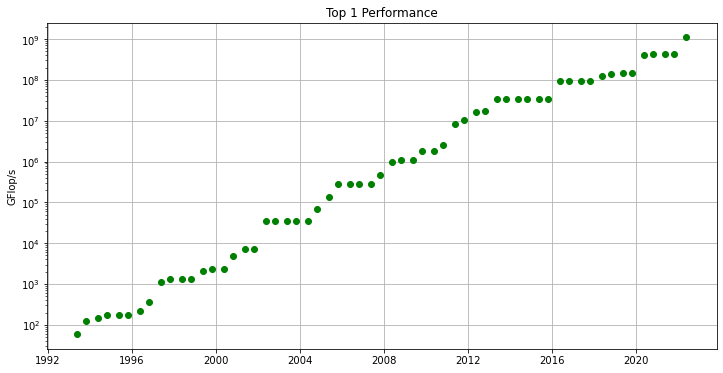

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(top1["date"], top1["top1 GFlop/s"], 'go')
plt.title('Top 1 Performance')
plt.ylabel('GFlop/s')
plt.yscale('log')
plt.grid(True)
plt.show()

Looks like exponential growth (log-scale y)

Let's fit linear regression model!

In [5]:
START_DATE = datetime.strptime("1993-06-01", "%Y-%m-%d").date()

prediction_dates = ["2022-11-01", "2023-06-01", "2023-11-01", "2024-06-01", 
                    "2024-11-01","2025-06-01", "2025-11-01" ]
days_list = [(datetime.strptime(date, "%Y-%m-%d").date() - START_DATE).days for date in prediction_dates]
days_list

[10745, 10957, 11110, 11323, 11476, 11688, 11841]

In [6]:
lr_model = LinearRegression()
lr_model.fit(np.array(top1['days_from_start']).reshape(-1, 1), np.log(top1['top1 GFlop/s']))

LinearRegression()

In [7]:
prediction = np.exp(lr_model.predict(np.array(days_list).reshape(-1,1)))

In [8]:
result = pd.DataFrame(data=prediction, index=prediction_dates, columns=["top 1 GFlop/s"])

In [9]:
result

,top 1 GFlop/s
2022-11-01,2.505419e+09
2023-06-01,3.518080e+09
2023-11-01,4.494717e+09
2024-06-01,6.321543e+09
2024-11-01,8.076434e+09
2025-06-01,1.134083e+10
2025-11-01,1.448911e+10


According to this model, by the end of 2025 top #1 supercomputer going to have perfomance level equal to 14.5 EFlop/s

# Estimation of the share of consumption of supercomputers

According to https://yearbook.enerdata.net/electricity/electricity-domestic-consumption-data.html total world power consumtion is 28433 TWh.

In [10]:
TOTAL_CONSUMPTION = 28433 #TWh

In [11]:
#data from https://www.top500.org/lists/top500/2022/06/download/GREEN500_202206.xlsx
data = pd.read_excel("TOP500_202206.xlsx")

In [12]:
#Let's fill n\a with median value
data['Power (kW)'].fillna(data['Power (kW)'].median())

0      21100.00
1      29899.23
2       2942.13
3      10096.00
4       7438.28
         ...   
495      835.00
496      835.00
497      835.00
498      835.00
499      835.00
Name: Power (kW), Length: 500, dtype: float64

In [13]:
computer_consumption = data['Power (kW)'].sum() 
computer_consumption /= 1e9 #TW
print(f"Total supercomputers consumption: {computer_consumption} TW")

Total supercomputers consumption: 0.00034048645 TW


In [14]:
(computer_consumption * 24 * 365 / TOTAL_CONSUMPTION) * 100

0.010490139281820422

As we can see, according to our model, it's slightly more than 0.01% of world electricity production. Not much.